In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
data=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

# Data Analysis

In [5]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [7]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.describe()

,target,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
target_num=data['target'].value_counts()
target_num

target
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
import nltk
#num of characters
data['num_characters'] = data['text'].apply(len)
# num of words
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#num of sentences
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [11]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [12]:
data.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [13]:
#ham with numerical values
data[data['target']=='ham'][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.076062,1.832332
std,58.016023,13.875446,1.431214
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [14]:
#spam with numerical values
data[data['target']=='spam'][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.706827,3.020080
std,29.183082,6.768560,1.538034
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


# Visualization

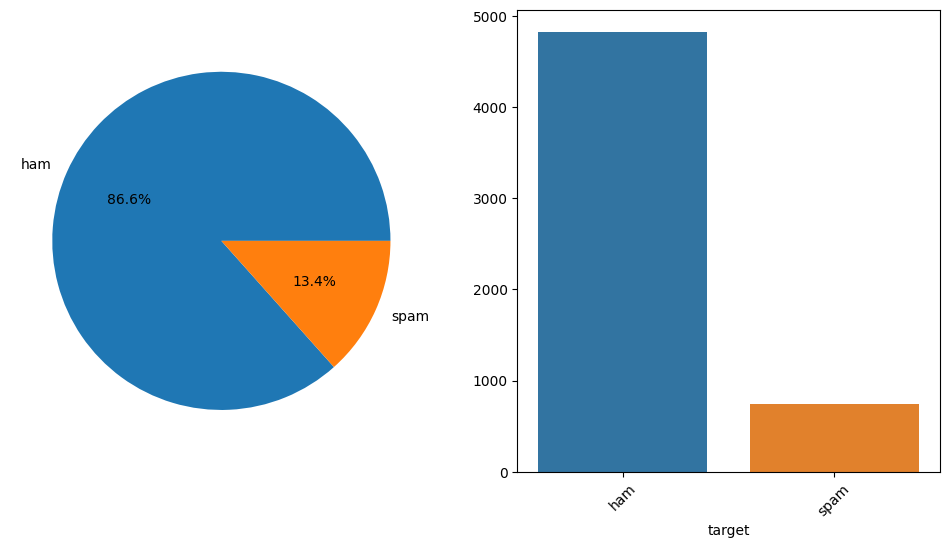

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(target_num, autopct='%1.1f%%', labels=target_num.index)

sns.barplot(x=target_num.index, y=target_num.values, ax=ax2)
plt.xticks(rotation=45)

plt.show()

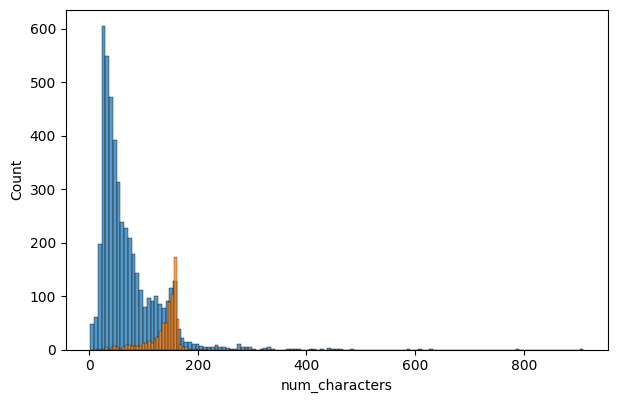

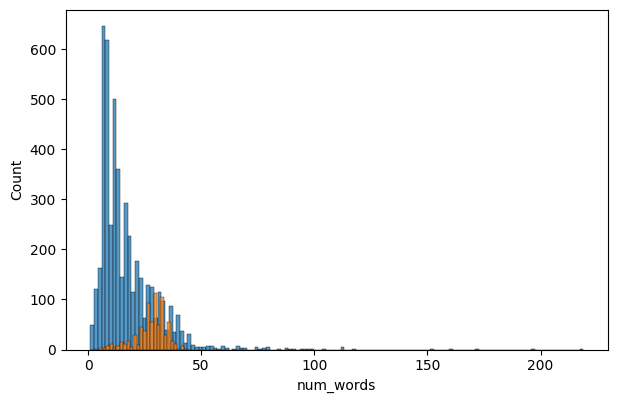

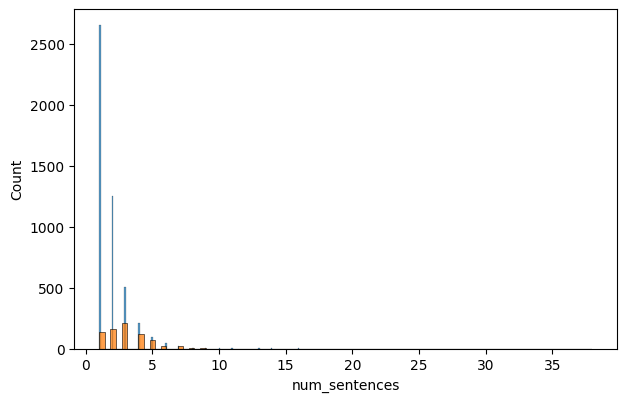

In [16]:
def hist_plot(x,fig):
    plt.figure(figsize=(7,15))
    plt.subplot(3,1,fig)
    sns.histplot(data[data['target']== 'ham'][x])
    sns.histplot(data[data['target']== 'spam'][x])

hist_plot('num_characters',1)
hist_plot('num_words',2)
hist_plot('num_sentences',3)
plt.show()

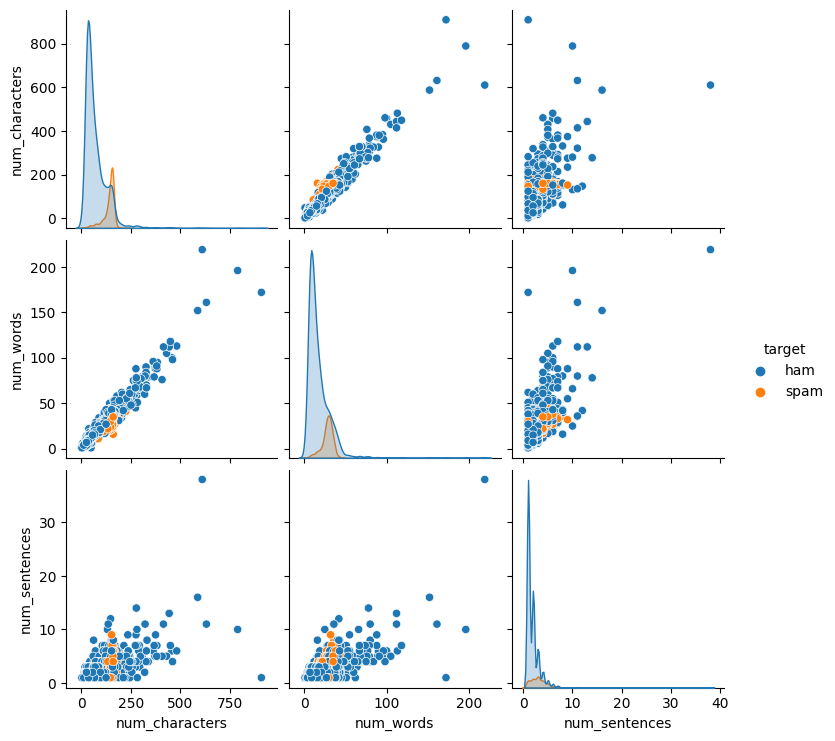

In [17]:
sns.pairplot(data,hue='target')
plt.show()

In [18]:
data = pd.concat([data, pd.get_dummies(data['target'], prefix='target' ,drop_first=True,dtype='int64')], axis=1)
data.drop('target', axis=1, inplace=True)


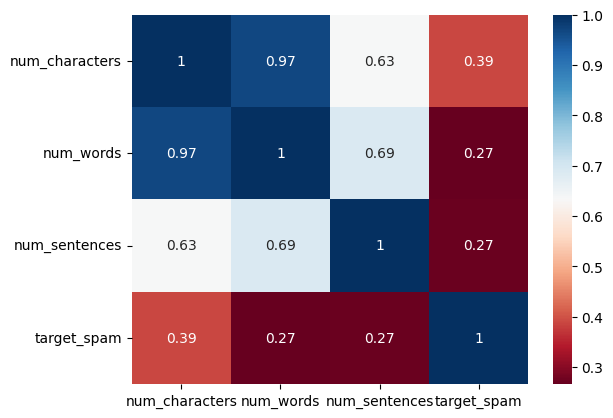

In [19]:
data_corr=data.select_dtypes('int64').corr()
sns.heatmap(data_corr,annot=True,cmap='RdBu')
plt.show()

In [20]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

string.punctuation
stopwords.words('english')
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [21]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [22]:
data['tranformed_text'] = data['text'].apply(transform_text)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

# Spliting data

In [24]:
X = tfidf.fit_transform(data['tranformed_text']).toarray()
y = data['target_spam']


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=44,shuffle=True)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Logistic Regression Model

In [27]:
logistic_reg=LogisticRegression(penalty='l1',solver='liblinear',C=0.1,max_iter=200)
logistic_reg.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=200, penalty='l1', solver='liblinear')

In [28]:
logistic_reg.score(X_train,y_train)

0.8812701334560515

In [29]:
logistic_reg.score(X_test,y_test)

0.8882544861337683

In [30]:
y_pred_reg=logistic_reg.predict(X_test)

In [31]:
print(list(y_test[:10]))
print(list(y_pred_reg[:10]))

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


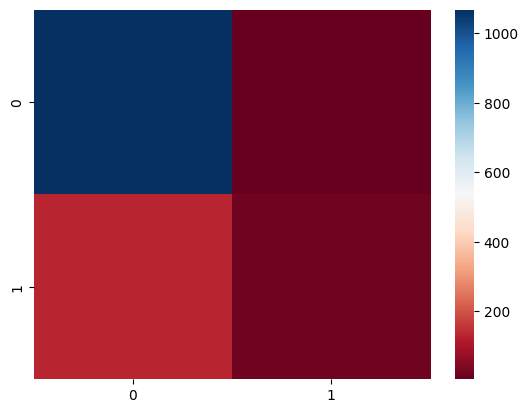

confusion_matrix:
 [[1068    5]
 [ 132   21]]
accuracy_score: 0.8882544861337683


In [32]:
acc_score=accuracy_score(y_test,y_pred_reg,normalize=True)

cm=confusion_matrix(y_test,y_pred_reg)
sns.heatmap(cm,cmap='RdBu')
plt.show()

print(f'confusion_matrix:\n {cm}')
print(f'accuracy_score: {acc_score}')

In [33]:
naive=MultinomialNB(alpha=0.1)
naive.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [34]:
naive.score(X_train,y_train)

0.9898757478140819

In [35]:
naive.score(X_test,y_test)

0.9812398042414355

In [36]:
naive.feature_log_prob_

array([[-11.39883019, -11.39883019, -11.39883019, ..., -11.39883019,
         -8.78968397,  -6.3694187 ],
       [ -7.94531797,  -7.94716472,  -6.53360695, ...,  -8.59718909,
        -10.02980703, -10.02980703]])

In [37]:
y_pred_naive=naive.predict(X_test)

In [38]:
print(list(y_test[:30]))
print(list(y_pred_naive[:30]))

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


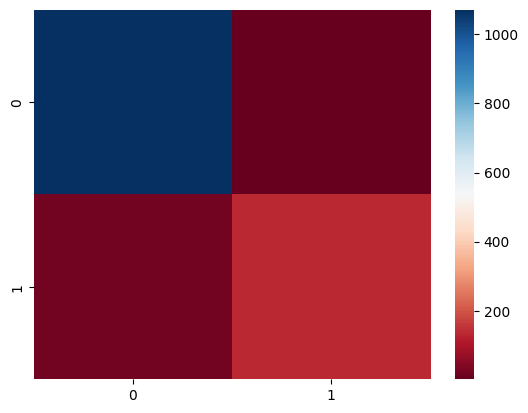

confusion_matrix:
 [[1071    2]
 [  21  132]]
accuracy_score: 0.9812398042414355


In [39]:
acc_score=accuracy_score(y_test,y_pred_naive,normalize=True)

cm=confusion_matrix(y_test,y_pred_naive)
sns.heatmap(cm,cmap='RdBu')
plt.show()

print(f'confusion_matrix:\n {cm}')
print(f'accuracy_score: {acc_score}')